# AffectNet Exploration

## Imports

In [1]:
# disable INFO messages (e.g. from tensorflow)

# 0 = all messages are logged (default behavior)
# 1 = INFO messages are not printed
# 2 = INFO and WARNING messages are not printed
# 3 = INFO, WARNING, and ERROR messages are not printed
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
print("Current Directory: {}".format(os.getcwd()))

Current Directory: /home/lndr/Development/FER/Notebooks


In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
import numpy as np
import random
from tensorflow import keras
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

## Dataset Paths

In [4]:
# dataset paths

afnet_img = '/home/lndr/Development/FER/AffectNet/train_set/images'
afnet_anno = '/home/lndr/Development/FER/AffectNet/train_set/annotations'

## Dataset Classes

In [5]:
# emotion categories
# classes 8-10 are not facial expressions but classes of uncertainty of annotators
classes = {
    0:'neutral',
    1:'happiness',
    2:'sadness',
    3:'surprise',
    4:'fear',
    5:'disgust',
    6:'anger',
    7:'contempt',
    8:'none',
    9:'uncertain',
    10:'no-face'
}

## Random Image Plot

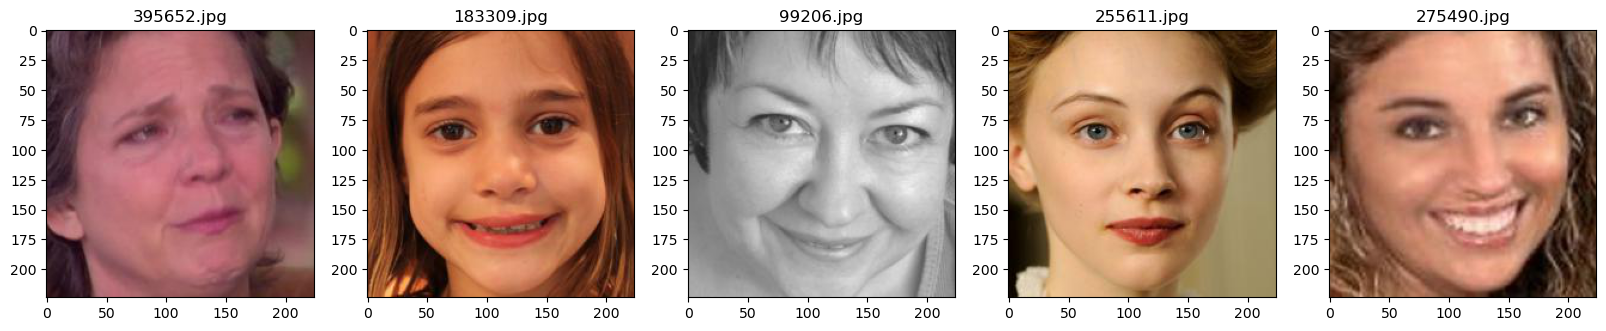

In [6]:
# select & plot random images

plt.figure(figsize=(20,20))

samples = 5
img_list = os.listdir(afnet_img) # list of all images in folder
img_list.sort(key=lambda x: int(os.path.splitext(x)[0]))  # Extract numeric prefix without file extension
img_files = [random.choice(img_list) for i in range(samples)] # random samples
img_indices = [img_list.index(img) for img in img_files] # indices 

for img_file in img_files:
    img_path = os.path.join(afnet_img, img_file)
    img = mpimg.imread(img_path)
    ax = plt.subplot(1,samples,img_files.index(img_file)+1)
    ax.title.set_text(img_file)
    plt.imshow(img)

## Plotting Corresponding Annotations

In [7]:
print('Image indices:\t', img_indices) # print indices
print('Image files:\t', [img_list[index] for index in img_indices]) # test if indices correspond to images shown above

Image indices:	 [274298, 126892, 68758, 176903, 190644]
Image files:	 ['395652.jpg', '183309.jpg', '99206.jpg', '255611.jpg', '275490.jpg']


In [8]:
# load file list of annotations
anno_list = os.listdir(afnet_anno)
# sort list by file name (ascending)
anno_list.sort(key=lambda x: int(x.split('_')[0])) # Assumes the numeric prefix is followed by an underscore
# collect corresponding file names of annotations
anno_files = [[anno_list[img_indices[i]*4+j] for j in range(0,4)] for i in range(0,len(img_indices))]
# sort files within list
for entry in anno_files:
    entry.sort(key=lambda x: x.split('_')[1])
anno_files

[['395652_aro.npy', '395652_exp.npy', '395652_lnd.npy', '395652_val.npy'],
 ['183309_aro.npy', '183309_exp.npy', '183309_lnd.npy', '183309_val.npy'],
 ['99206_aro.npy', '99206_exp.npy', '99206_lnd.npy', '99206_val.npy'],
 ['255611_aro.npy', '255611_exp.npy', '255611_lnd.npy', '255611_val.npy'],
 ['275490_aro.npy', '275490_exp.npy', '275490_lnd.npy', '275490_val.npy']]

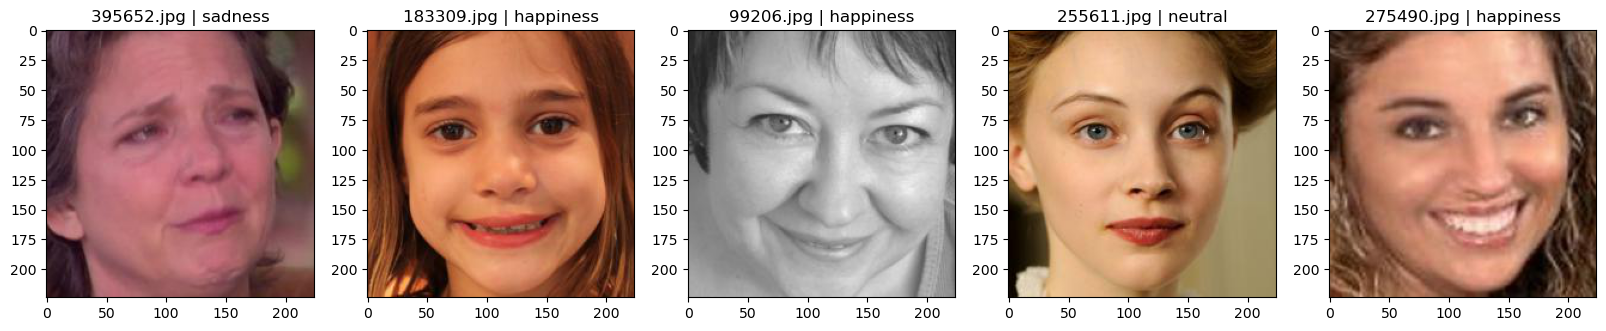

In [9]:
# Plot images again with corresponding classes
plt.figure(figsize=(20,20))
for img_file in img_files:
    img_path = os.path.join(afnet_img, img_file)
    img = mpimg.imread(img_path)
    
    anno_file_path = os.path.join(afnet_anno, anno_files[img_files.index(img_file)][1]) # index 1 is _exp.npy
    exp_class = int(np.load(anno_file_path))
    expression = classes[exp_class]
    
    ax = plt.subplot(1,samples,img_files.index(img_file)+1)
    ax.title.set_text('{} | {}'.format(img_file, expression))
    plt.imshow(img)

In [10]:
# show annotation infos
for img_file in img_files:
    for i in range(4):
        file = anno_files[img_files.index(img_file)][i]
        anno_file_path = os.path.join(afnet_anno, file)
        data = np.load(anno_file_path)
        print('Info from {}:\n'.format(file), data)
        if i == 2:
            print('\t\tLandmark count: {}'.format(len(data)//2)) # landmarks given by (x,y), so divide by 2
        print()

Info from 395652_aro.npy:
 -0.268647

Info from 395652_exp.npy:
 2

Info from 395652_lnd.npy:
 [-20.20650519 138.28888889 -13.99806228 162.28333333  -7.03778547
 185.24333333   4.39474048 205.96333333  22.8650519  224.24111111
  48.98546713 235.53444444  77.56290657 242.36333333 105.40401384
 245.17111111 126.7266436  240.36444444 143.47626298 231.29555556
 155.37384083 213.58555556 165.03141869 197.36888889 171.30186851
 178.79555556 173.33259516 159.95       173.00705882 140.7
 170.2167474  120.05777778 164.48885813 100.42666667  20.40027682
 102.86111111  35.39820069  92.56333333  51.35723183  86.52777778
  69.42449827  83.22222222  86.46865052  86.20111111 112.9533564
  82.87222222 123.56429066  73.74111111 135.95792388  69.04333333
 148.69259516  67.97       156.69923875  75.06333333 104.59792388
 101.22       109.33370242 111.97666667 114.36401384 122.57777778
 119.99114187 134.05777778 100.40470588 156.56666667 109.89176471
 155.98333333 118.19294118 156.13111111 124.92844291 15

## Plot Facial Landmarks

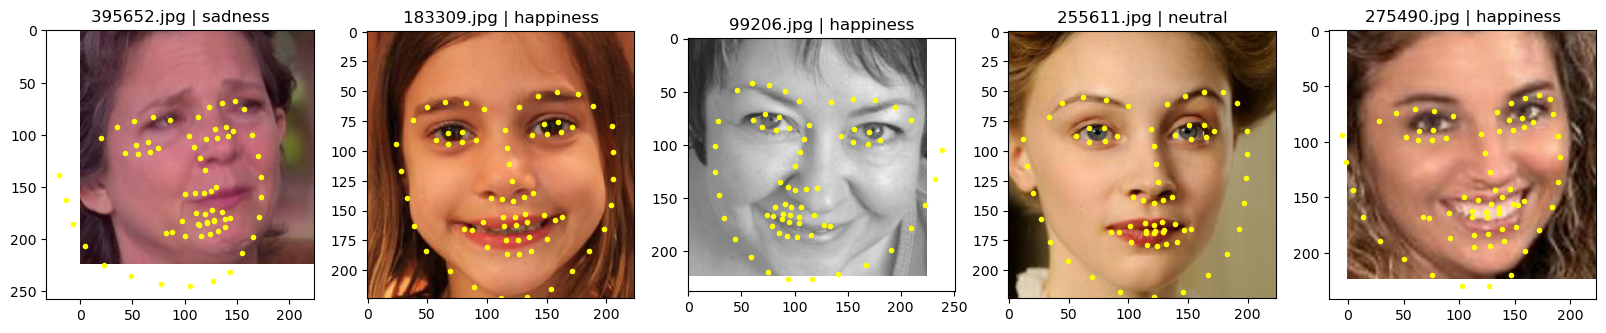

In [11]:
# Plot images again with corresponding classes and landmarks
plt.figure(figsize=(20,20))
for img_file in img_files:
    img_path = os.path.join(afnet_img, img_file)
    img = mpimg.imread(img_path)
    
    exp_file_path = os.path.join(afnet_anno, anno_files[img_files.index(img_file)][1]) # index 1 is _exp.npy
    exp_class = int(np.load(exp_file_path))
    expression = classes[exp_class]
    
    facial_landmarks = np.load(os.path.join(afnet_anno, anno_files[img_files.index(img_file)][2])) # index 2 is _lnd.npy
    # Convert the landmarks to a 2D array with shape (68, 2)
    facial_landmarks = facial_landmarks.reshape((68, 2))
    
    ax = plt.subplot(1,samples,img_files.index(img_file)+1)
    ax.title.set_text('{} | {}'.format(img_file, expression))
    
    plt.imshow(img)
    plt.scatter(facial_landmarks[:, 0], facial_landmarks[:, 1], c='yellow', marker='.')

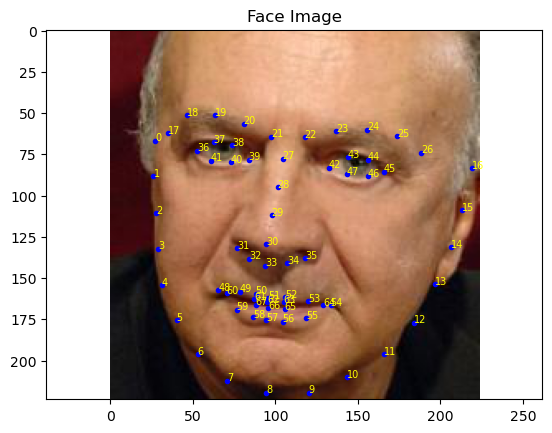

In [12]:
# Load the facial landmarks from the npy file
facial_landmarks = np.load(os.path.join(afnet_anno, '30802_lnd.npy'))

# Convert the landmarks to a 2D array with shape (68, 2)
facial_landmarks = facial_landmarks.reshape((68, 2))

# Load the corresponding face image
face_image = mpimg.imread(os.path.join(afnet_img, '30802.jpg'))

# Create a separate plot for facial landmarks
#plt.figure()
#plt.scatter(facial_landmarks[:, 0], facial_landmarks[:, 1], c='red', marker='.')
#plt.title('Facial Landmarks')
#plt.xlabel('X')
#plt.ylabel('Y')
#plt.gca().invert_yaxis()
#plt.axis('equal')

# Create a plot with the face image
plt.figure()
plt.imshow(face_image)
plt.title('Face Image')
plt.axis('equal')

# Overlay the facial landmarks on the face image
plt.scatter(facial_landmarks[:, 0], facial_landmarks[:, 1], c='blue', marker='.')

# Plot numbers next to each facial landmark point
for i, landmark in enumerate(facial_landmarks):
    plt.text(landmark[0], landmark[1], str(i), color='yellow', fontsize=7)

# Display the plots
plt.show()

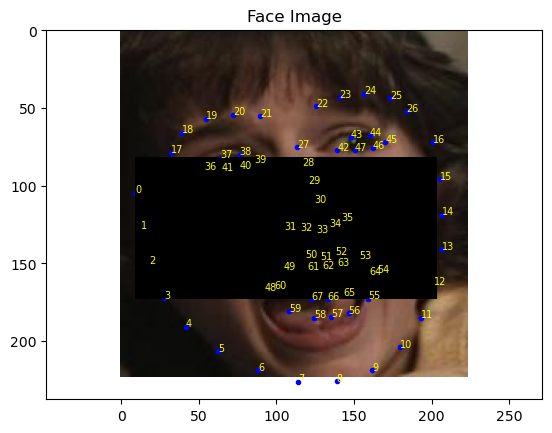

In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Load the facial landmarks from the npy file
facial_landmarks = np.load(os.path.join(afnet_anno, '152225_lnd.npy'))

# Convert the landmarks to a 2D array with shape (68, 2)
facial_landmarks = facial_landmarks.reshape((68, 2))

# Load the corresponding face image
face_image = mpimg.imread(os.path.join(afnet_img, '152225.jpg'))

# Create a plot with the face image
fig, ax = plt.subplots()
ax.imshow(face_image)
ax.set_title('Face Image')
ax.axis('equal')

# Overlay the facial landmarks on the face image
ax.scatter(facial_landmarks[:, 0], facial_landmarks[:, 1], c='blue', marker='.')

# Plot numbers next to each facial landmark point
for i, landmark in enumerate(facial_landmarks):
    ax.text(landmark[0], landmark[1], str(i), color='yellow', fontsize=7)

# Calculate the dimensions for the rectangle
width = np.linalg.norm(facial_landmarks[0] - facial_landmarks[16])
height = width / (224 / 105)

# Calculate the coordinates for the rectangle corners
A = facial_landmarks[0]
D = facial_landmarks[16]
AB = facial_landmarks[0] + (facial_landmarks[16] - facial_landmarks[0]) / 2
B = AB - (facial_landmarks[36] - facial_landmarks[45]) * height / (2 * np.linalg.norm(facial_landmarks[36] - facial_landmarks[45]))
C = AB + (facial_landmarks[36] - facial_landmarks[45]) * height / (2 * np.linalg.norm(facial_landmarks[36] - facial_landmarks[45]))
CD = AB

# Create and add the rectangle patch to the plot
rect = patches.Rectangle((A[0], B[1]), width, height, facecolor='black')
ax.add_patch(rect)

# Display the plot
plt.show()


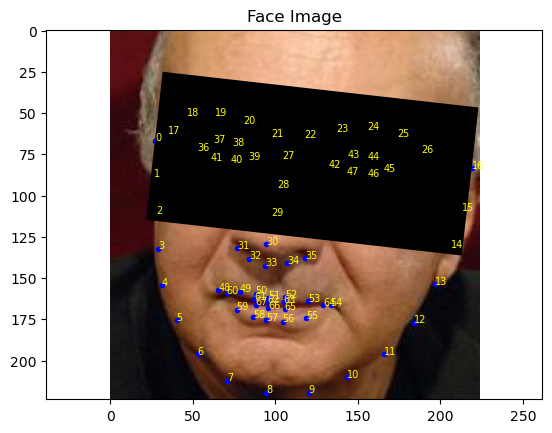

In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Load the facial landmarks from the npy file
facial_landmarks = np.load(os.path.join(afnet_anno, '30802_lnd.npy'))

# Convert the landmarks to a 2D array with shape (68, 2)
facial_landmarks = facial_landmarks.reshape((68, 2))

# Load the corresponding face image
face_image = mpimg.imread(os.path.join(afnet_img, '30802.jpg'))

# Create a plot with the face image
fig, ax = plt.subplots()
ax.imshow(face_image)
ax.set_title('Face Image')
ax.axis('equal')

# Overlay the facial landmarks on the face image
ax.scatter(facial_landmarks[:, 0], facial_landmarks[:, 1], c='blue', marker='.')

# Plot numbers next to each facial landmark point
for i, landmark in enumerate(facial_landmarks):
    ax.text(landmark[0], landmark[1], str(i), color='yellow', fontsize=7)

# Calculate the distance between facial landmark 0 and facial landmark 16
# norm = vector length, euclidean distance = distance
width = np.linalg.norm(facial_landmarks[0] - facial_landmarks[16])

# meta quest 2 aspect ratio (width/height)
aspect_ratio = 224/105

# Calculate the height of the rectangle
height = width / (aspect_ratio)

# Calculate the center point between facial landmark 36 and facial landmark 45 (eyes)
eye_center = facial_landmarks[36] + (facial_landmarks[45] - facial_landmarks[36]) / 2
# Calculate the center point between facial landmark 0 and facial landmark 16 (temporal bones)
temporal_bone_center = facial_landmarks[0] + (facial_landmarks[16] - facial_landmarks[0]) / 2

# Translate eye_center to be exactly between temporal bones
# calc vector v
v = temporal_bone_center - eye_center
# calc direction of straight line
direction_straight = facial_landmarks[45] - facial_landmarks[36]
# norm (lenght) of v
norm_v = np.linalg.norm(v)
# project vector v in direction of straight line of eye_center
projection = np.dot(v, direction_straight) / np.dot(direction_straight, direction_straight) * direction_straight
# translate eye_center by vector projection
center = eye_center + projection


# Calculate the angle between facial landmark 36 and facial landmark 45
oppocite_length = facial_landmarks[45, 1] - facial_landmarks[36, 1] # Gegenkathete, y-axis
adjacent_length = facial_landmarks[45, 0] - facial_landmarks[36, 0] # Ankathete, x-axis
angle = np.arctan2(oppocite_length, adjacent_length)

# Calculate the corner points of the rectangle
#A = horizontal_center - width / 2 * np.array([np.cos(angle), np.sin(angle)])
A = center - width / 2 * np.array([np.cos(angle), np.sin(angle)]) - height / 2 * np.array([-np.sin(angle), np.cos(angle)])

# Create and add the rectangle patch to the plot
rect = patches.Rectangle((A[0], A[1]), width, height, angle=np.degrees(angle), facecolor='black')
ax.add_patch(rect)

# Display the plot
plt.show()